# Modelling fluid inclusion stretching during simple isothermal ascent
- This notebook shows how to model the stretching of CO2 dominated fluid inclusions in olivine using python tool pfiFI (DeVitre and Wieser, 2023; EarthArXiv), implemented in DiadFit. Note that this tool is not designed to model FI with fluids other than CO2 at this time, or those in phases other than olivine. It is based on the model of Wanamaker and Evans, 1989.
- In this example (presented in the DiadFit paper), we model the stretching of a 1 micron radius pure CO2 fluid inclusion, 100 microns away from the crystal rim during ascent from 10km depth to the surface. We consider an ascent rate of 1 m/s (~0.03 MPa/s - equivalent to a Hawaiian style eruption) and a temperature of 1200 degrees celsius.

## First, make sure CoolProp is installed if using the Span and Wagner 1996 equation of state
- You only need to run this once. If you do not wish to use CoolProp, or face installation problems, please use 'SP94' instead of 'SW96'

In [2]:
%pip install CoolProp

## Next import the necessary packages, including DiadFit

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import DiadFit as pf

## Now let's model stretching and evaluate how density, pressure and radius change

### First, set the initial conditions

In [8]:
T_K = 1200 + 273.15  # Temperature in Kelvin (Here 1200 degrees Celsius converted to Kelvin)

R_m = 1 * 10**-6  # radius of the FI in meters (here 1 micron)
b_m=100*10**-6 # distance to the crystal edge or crack (here 100 microns)
ascent_rate_ms=1 # ascent rate in m/s

depth_path_ini_fin_step=[10,0,20] #This defines the starting depth, ending depth and the number of steps in the path. More steps is better, especially for slow ascent rates.

crustal_model_config=pf.config_crustalmodel(crust_dens_kgm3=2750)# the configuration of your crustal model, here we set a single crustal density for the whole path; you can call help (pf.config_crustalmodel) for more options 

EOS='SW96' # Equation of state for CO2 (SW96 or SP94) if using SW96, ensure CoolProp is installed
plotfig=True # Whether to plot the figure or not
update_b=False # Whether to update b as the radius of the FI changes
report_results='fullpath' # Whether to report all the results, only the first and last step or only the last step

### Now run the model
- Note that the decrease in density for the conditions of our model is very small (< 1%), in fact much smaller than the uncertainty in any measurement that could be made. 

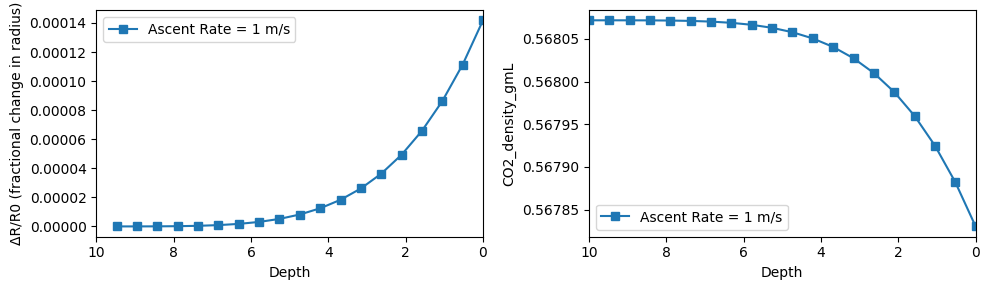

,Time(s),Step,dt(s),Pexternal(MPa),Pinternal(MPa),dR/dt(m/s),Fi_radius(μm),b (distance to xtal rim -μm),ΔR/R0 (fractional change in radius),CO2_dens_gcm3,Depth(km)
0,0.000000,0,0.000000,269.775000,269.775000,0.000000e+00,1.000000,100.0,NaN,0.568072,10.000000
1,526.315789,1,526.315789,255.576316,269.774999,1.446726e-18,1.000000,100.0,7.614349e-10,0.568072,9.473684
2,1052.631579,2,526.315789,241.377632,269.774986,1.754262e-17,1.000000,100.0,9.994390e-09,0.568072,8.947368
3,1578.947368,3,526.315789,227.178947,269.774931,7.551312e-17,1.000000,100.0,4.973814e-08,0.568072,8.421053
4,2105.263158,4,526.315789,212.980263,269.774777,2.127162e-16,1.000000,100.0,1.616940e-07,0.568072,7.894737
5,2631.578947,5,526.315789,198.781579,269.774432,4.749781e-16,1.000000,100.0,4.116825e-07,0.568071,7.368421
6,3157.894737,6,526.315789,184.582895,269.773767,9.156314e-16,1.000001,100.0,8.935937e-07,0.568070,6.842105
7,3684.210526,7,526.315789,170.384211,269.772608,1.594852e-15,1.000002,100.0,1.732989e-06,0.568069,6.315789
8,4210.526316,8,526.315789,156.185526,269.770735,2.579160e-15,1.000003,100.0,3.090442e-06,0.568067,5.789474
9,4736.842105,9,526.315789,141.986842,269.767873,3.941020e-15,1.000005,100.0,5.164663e-06,0.568063,5.263158


In [9]:
results = pf.stretch_in_ascent(R_m=R_m, b_m=b_m,T_K=T_K,ascent_rate_ms=ascent_rate_ms,crustal_model_config=crustal_model_config,
                                                 depth_path_ini_fin_step=depth_path_ini_fin_step,EOS=EOS,plotfig=plotfig,update_b=update_b,report_results=report_results)

results

## Example, Fig 8 from Wanamaker and Evans 1989

,Time(s),Step,dt(s),Pexternal(MPa),Pinternal(MPa),dR/dt(m/s),Fi_radius(μm),b (distance to xtal rim -μm),ΔR/R0 (fractional change in radius),CO2_dens_gcm3,Depth(km)
0,0.000000e+00,0,0.000000,809.325000,809.325000,0.000000e+00,1.000000,1000.0,NaN,0.927473,30.000000
1,1.578947e+05,1,157894.736842,766.728947,799.782645,1.163351e-14,1.001837,1000.0,0.001837,0.922381,28.421053
2,3.157895e+05,2,157894.736842,724.132895,729.780142,9.214945e-14,1.016387,1000.0,0.016387,0.883333,26.842105
3,4.736842e+05,3,157894.736842,681.536842,716.817777,1.851318e-14,1.019310,1000.0,0.019310,0.875755,25.263158
4,6.315789e+05,4,157894.736842,638.940789,649.894363,1.040974e-13,1.035746,1000.0,0.035746,0.834720,23.684211
5,7.894737e+05,5,157894.736842,596.344737,633.767595,2.747294e-14,1.040084,1000.0,0.040084,0.824320,22.105263
6,9.473684e+05,6,157894.736842,553.748684,571.184708,1.171408e-13,1.058580,1000.0,0.058580,0.781862,20.526316
7,1.105263e+06,7,157894.736842,511.152632,550.753709,4.237659e-14,1.065271,1000.0,0.065271,0.767222,18.947368
8,1.263158e+06,8,157894.736842,468.556579,493.415518,1.321885e-13,1.086143,1000.0,0.086143,0.723836,17.368421
9,1.421053e+06,9,157894.736842,425.960526,467.906976,6.617173e-14,1.096591,1000.0,0.096591,0.703343,15.789474


,Time(s),Step,dt(s),Pexternal(MPa),Pinternal(MPa),dR/dt(m/s),Fi_radius(μm),b (distance to xtal rim -μm),ΔR/R0 (fractional change in radius),CO2_dens_gcm3,Depth(km)
0,0.000000e+00,0,0.000000,809.325000,809.325000,0.000000e+00,1.000000,1000.0,NaN,0.930837,30.000000
1,1.578947e+05,1,157894.736842,766.728947,799.600074,1.163351e-14,1.001837,1000.0,0.001837,0.925726,28.421053
2,3.157895e+05,2,157894.736842,724.132895,728.515036,9.135134e-14,1.016261,1000.0,0.016261,0.886866,26.842105
3,4.736842e+05,3,157894.736842,681.536842,716.381965,1.682210e-14,1.018917,1000.0,0.018917,0.879949,25.263158
4,6.315789e+05,4,157894.736842,638.940789,648.525083,1.019758e-13,1.035018,1000.0,0.035018,0.839517,23.684211
5,7.894737e+05,5,157894.736842,596.344737,633.266438,2.500913e-14,1.038967,1000.0,0.038967,0.829981,22.105263
6,9.473684e+05,6,157894.736842,553.748684,569.584084,1.143969e-13,1.057030,1000.0,0.057030,0.788156,20.526316
7,1.105263e+06,7,157894.736842,511.152632,550.260632,3.839114e-14,1.063092,1000.0,0.063092,0.774750,18.947368
8,1.263158e+06,8,157894.736842,468.556579,491.799656,1.290887e-13,1.083474,1000.0,0.083474,0.731843,17.368421
9,1.421053e+06,9,157894.736842,425.960526,467.474652,6.049020e-14,1.093025,1000.0,0.093025,0.712826,15.789474


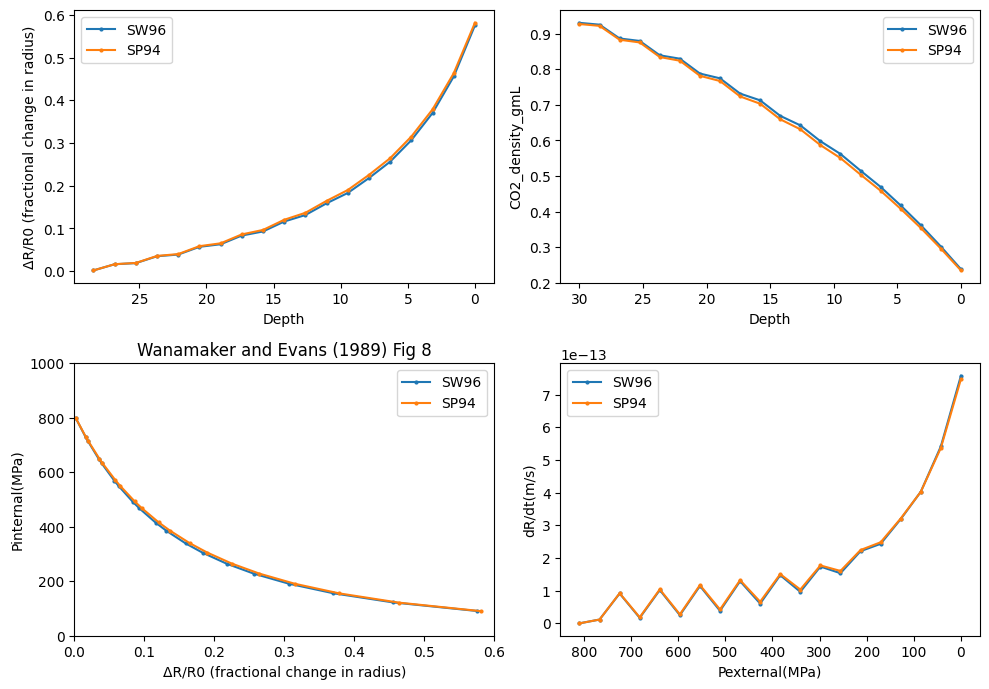

In [6]:
## Let's set the initial conditions
T = 1400 + 273.15  # Temperature in Kelvin

# Radius in m and ascent rate in m/s
R0 = 1 * 10**-6  # Initial value of R (radius of the FI in m)
b=1000*R0 # distance to the crystal edge, Wanamaker uses R0/b=1/1000
ascent_rate_ms=0.01 #m/s

depth_path_ini_fin_step=[30,0,20] #This defines the starting depth, ending depth and the number of steps in the path. 
crustal_model_config=relax.config_crustalmodel(crust_dens_kgm3=2750)#the configuration of your crustal model

EOS='SW96' # Equation of state for CO2 (SW96 or SP94)
plotfig=False # Whether to plot the figure or not

resultsSW96 = relax.stretch_in_ascent(R_m=R0, b_m=b,T_K=T,ascent_rate_ms=ascent_rate_ms,crustal_model_config=crustal_model_config,
                                                 depth_path_ini_fin_step=depth_path_ini_fin_step,EOS='SW96',plotfig=plotfig)
resultsSP94 = relax.stretch_in_ascent(R_m=R0, b_m=b,T_K=T,ascent_rate_ms=ascent_rate_ms,crustal_model_config=crustal_model_config,
                                                 depth_path_ini_fin_step=depth_path_ini_fin_step,EOS='SP94',plotfig=plotfig)

display(resultsSP94)
display(resultsSW96)
# NOW PLOT - This is the configuration of the plots, can modify x and y vars under 'keys', the first is x the second y

subplot_data = [
    {'data': [resultsSW96, resultsSP94], 'keys': [('Depth(km)', '\u0394R/R0 (fractional change in radius)')], 'xlabel': 'Depth', 'ylabel': '\u0394R/R0 (fractional change in radius)', 'legend': True},
    {'data': [resultsSW96, resultsSP94], 'keys': [('Depth(km)', 'CO2_dens_gcm3')], 'xlabel': 'Depth', 'ylabel': 'CO2_density_gmL', 'legend': True},
    {'data': [resultsSW96, resultsSP94], 'keys': [('\u0394R/R0 (fractional change in radius)', 'Pinternal(MPa)')], 'xlabel': '\u0394R/R0 (fractional change in radius)', 'ylabel': 'Pinternal(MPa)', 'legend': True},
    {'data': [resultsSW96, resultsSP94], 'keys': [('Pexternal(MPa)', 'dR/dt(m/s)')], 'xlabel': 'Pexternal(MPa)', 'ylabel': 'dR/dt(m/s)', 'legend': True}
]

# Make plots
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs = axs.flatten()

for ax, subplot in zip(axs, subplot_data):
    for data, label in zip(subplot['data'], ['SW96', 'SP94']):
        for x_key, y_key in subplot['keys']:
            if x_key=='Depth(km)':
                ax.plot(data[x_key], data[y_key], marker='o', markersize=2, label=label)
            else:
                ax.plot(data[x_key], data[y_key], marker='o', markersize=2, label=label)            
    ax.set_xlabel(subplot['xlabel'])
    ax.set_ylabel(subplot['ylabel'])
    if subplot.get('legend', False):
        ax.legend()
axs[2].set_title("Wanamaker and Evans (1989) Fig 8")
axs[2].set_xlim(0, 0.6)
axs[2].set_ylim(0, 1000)
axs[0].invert_xaxis()
axs[1].invert_xaxis()
axs[3].invert_xaxis()
plt.tight_layout()
plt.show()

## We can also model the stretching of an FI at constant external Pressure (i.e., during storage or quenching)

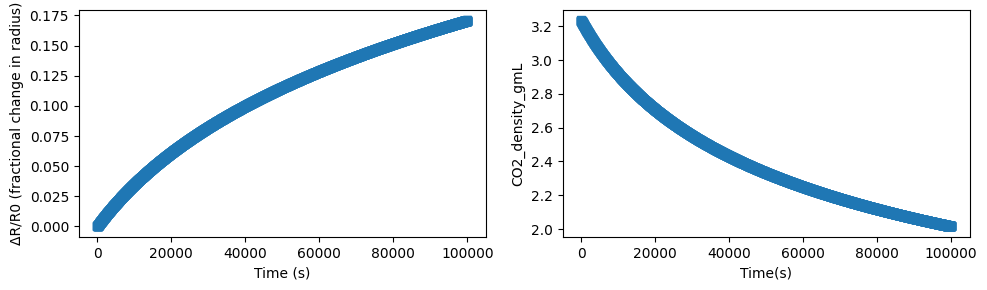

,Time(s),Step,dt(s),Pexternal(MPa),Pinternal(MPa),dR/dt(m/s),Fi_radius(μm),b (distance to xtal rim -μm),ΔR/R0 (fractional change in radius),CO2_dens_gcm3
0,0,0,0,0,900.000000,4.153999e-12,1.000000,1000.0,0.000000,3.233977
1,20,1,20,0,899.775721,4.153999e-12,1.000083,1000.0,0.000083,3.233171
2,40,2,20,0,899.551699,4.150621e-12,1.000166,1000.0,0.000166,3.232366
3,60,3,20,0,899.327934,4.147250e-12,1.000249,1000.0,0.000249,3.231562
4,80,4,20,0,899.104424,4.143884e-12,1.000332,1000.0,0.000332,3.230759
...,...,...,...,...,...,...,...,...,...,...
4995,99900,4995,20,0,560.881724,8.878669e-13,1.170731,1000.0,0.170731,2.015420
4996,99920,4996,20,0,560.856207,8.877351e-13,1.170749,1000.0,0.170749,2.015329
4997,99940,4997,20,0,560.830695,8.876033e-13,1.170766,1000.0,0.170766,2.015237
4998,99960,4998,20,0,560.805188,8.874716e-13,1.170784,1000.0,0.170784,2.015145


In [7]:
import RelaxiFI as relax
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

T=1200+273.15
Pinternal=900
Pexternal=0

R0 = 1.0*10**-6  # Initial value of R
b = R0 * 1000  # Value of b
steps = 5000  # Number of steps to iterate
totaltime = 100000

EOS='ideal'
method='Euler'
plotfig=True

solution = relax.stretch_at_constant_Pext(R_m=R0, b_m=b, T_K=T, Pinternal_MPa=Pinternal, Pexternal_MPa=Pexternal, 
                                        totaltime_s=totaltime, steps=steps, EOS=EOS,method=method,
                                        plotfig=plotfig)
solution

## Example, Fig 3 from Wanamaker and Evans 1989

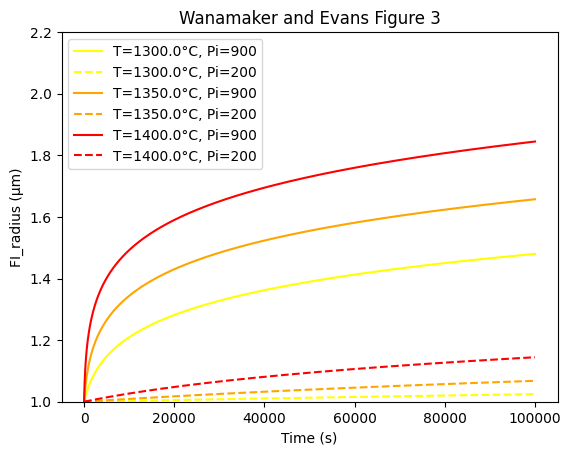

In [8]:
T_list = [1300,1350,1400]
temperatures=[t + 273.15 for t in T_list]

Pinternal_values = [900, 200]
Pexternal=0
dataframes = {}

R0 = 1.0e-6  # Initial value of R
b = R0 * 1000  # Value of b
steps = 5000  # Number of steps to iterate
totaltime = 100000

EOS='ideal'
method='Euler'
plotfig=False


for temperature in temperatures:
    for Pinternal in Pinternal_values:
        T = temperature
        solution = relax.stretch_at_constant_Pext(R_m=R0, b_m=b, T_K=T, Pinternal_MPa=Pinternal, Pexternal_MPa=Pexternal, 
                                              totaltime_s=totaltime, steps=steps, EOS=EOS,method=method,
                                              plotfig=plotfig)
        key = f"T={temperature-273.15}°C, Pi={Pinternal}"
        dataframes[key] = solution

        if 'T=1300' in key:
            color='yellow'
        if 'T=1350' in key:
            color='orange'
        if 'T=1400' in key:
            color='red'
        if 'Pi=900' in key:
            linestyle='-'
        if 'Pi=200' in key:
            linestyle='--'

        plt.plot(solution['Time(s)'], solution['Fi_radius(μm)'], label=key,color=color,linestyle=linestyle)

plt.xlabel('Time (s)')
plt.ylabel('FI_radius (μm)')
plt.title("Wanamaker and Evans Figure 3")
plt.ylim([1,2.2])
plt.legend()
plt.show()


## We can then build custom system models as we want
- For example here, we model the eruption of an FI of radius 2.5 um trapped at South Caldera Reservoir (Kilaeua) that is stored at Hale'mau'mau reservoir for 10 days

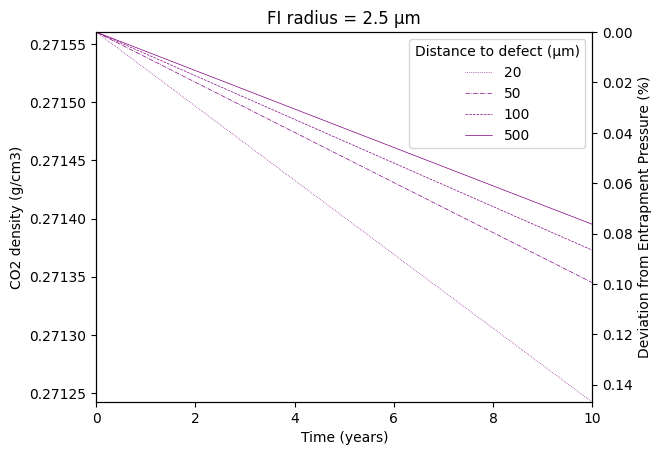

In [9]:
####### Establish reservoir PTX conditions
## FI radius
R0 = 2.5 * 10 ** -6 # FI radius in m

## Crustal model crustal_model_configuration
crustal_model_config=relax.config_crustalmodel(crust_dens_kgm3=2750) # You can adjust as you want just call help for details

## Trapping reservoir conditions
Trapping_temp=1300
Trapping_pressure = 1 # in kbar

## surface conditions
Storage_temp=1150  # T in C
Storage_pressure = 0.001 # in kbar

####### Let's start our model

### First let's calculate the CO2 density 
fi_rho_initial_gcm3=relax.calculate_rho_for_P_T(EOS='SW96',P_kbar=Trapping_pressure,T_K=Trapping_temp+273.15)[0]

## Now we move the FI to HM reservoir
fi_Pi_storage_initial_MPa=relax.calculate_P_for_rho_T(EOS='SW96',CO2_dens_gcm3=fi_rho_initial_gcm3,T_K=Storage_temp+273.15)['P_MPa'][0]

## Now let's leave it at HM for 10 days
days=10

## Choose equation of state, numerical method and distances to crytal defects

EOS='SW96' # Equation of state for CO2, option SW96, SP94 or ideal

method='RK1' # this is the numerical solver, options are RK1, RK2, RK3 and RK4 (Runge-Kutta)
steps=1000 #number of steps, more is better but slower

dist2defect_list=[20,50,100,500] # Distances to crystal defect structures in microns

T = Storage_temp + 273.15 # T in Kelvin for the model
Pinternal=fi_Pi_storage_initial_MPa
Pexternal=Storage_pressure*100 ##Pressure in MPa for this model

day_in_sec=(24*60*60)
totaltime=days*day_in_sec

## This calculates bvalues for the distances to defect you choose
def calc_multiplier(R0, dist2defect_um):
    multiplier = (dist2defect_um) / (R0 * 10**6)
    return multiplier

R_values = [R0]  # Define R values
b_values= [calc_multiplier(R0, dist)*R0 for dist in dist2defect_list]


# Call the function with appropriate arguments

results_dict_surface = relax.loop_R_b_constant_Pext(R_m_values=R_values, b_m_values=b_values, T_K=T, EOS=EOS, Pinternal_MPa=Pinternal, Pexternal_MPa=Pexternal, 
                                                    totaltime_s=totaltime, steps=steps, T4endcalc_PD=Trapping_temp,method=method,
                                              plotfig=False,crustal_model_config=crustal_model_config)


################## Now let's plot our results ######################

# Define some constants and variables
linecolor = 'darkred'
linecolor2 = 'orange'
seconds_in_e_year = 365.25 * 24 * 60 * 60
y_col = 'CO2_dens_gcm3'
x_col = 'Time(s)'
twin_col = 'Calculated depths (km)_TrappingT'
xlabel4plot = 'Time(years)'
ylabel4plot = 'CO2 density (g/cm3)'
twinlabel4plot = 'Calculated depth (km)_TrappingT'
linecolor = 'midnightblue'
linecolor2 = 'purple'
linewidth = 0.5

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data on the primary y-axis


ax.plot(results_dict_surface['R0']['b0'][x_col] / day_in_sec, results_dict_surface['R0']['b0'][y_col], color=linecolor2, linestyle=':', linewidth=linewidth, label=str(round(b_values[0] * 10 ** 6)))
ax.plot(results_dict_surface['R0']['b1'][x_col] / day_in_sec, results_dict_surface['R0']['b1'][y_col], color=linecolor2, linestyle='-.', linewidth=linewidth, label=str(round(b_values[1] * 10 ** 6)))
ax.plot(results_dict_surface['R0']['b2'][x_col] / day_in_sec, results_dict_surface['R0']['b2'][y_col], color=linecolor2, linestyle='--', linewidth=linewidth, label=str(round(b_values[2] * 10 ** 6)))
ax.plot(results_dict_surface['R0']['b3'][x_col] / day_in_sec, results_dict_surface['R0']['b3'][y_col], color=linecolor2, linestyle='-', linewidth=linewidth, label=str(round(b_values[3] * 10 ** 6)))
ax2 = ax.twinx()

xlim_F=([round(min(results_dict_surface['R0']['b0'][x_col]/day_in_sec)),round(max(results_dict_surface['R0']['b0'][x_col]/day_in_sec))])
ymin_F=np.nanmin([np.nanmin(results_dict_surface['R0']['b0'][y_col])])

ylim_F=[ymin_F,fi_rho_initial_gcm3]

ylim_P_F=relax.calculate_P_for_rho_T(EOS='SW96',CO2_dens_gcm3=pd.Series(ylim_F),T_K=Trapping_temp+273.15)['P_MPa']

ylim_D_F=relax.convert_pressure_to_depth(P_kbar=ylim_P_F/100,
                model='ryan_lerner')



def percent_drop(ylim, original_value):
    return 100-ylim*100/original_value



ax.set_xlim(xlim_F)
ax.set_ylim(ylim_F)
ax2.set_ylim(percent_drop(ylim_P_F,original_value=Trapping_pressure*100))

# Customize axis labels and legends
ax.set_title(f"FI radius = {round(R_values[0]*10**6,1)} μm")
ax.set_xlabel('Time (years)')
ax.set_ylabel(ylabel4plot)
ax2.set_ylabel('Deviation from Entrapment Pressure (%)')

ax.legend(title='Distance to defect (μm)')

